<a href="https://colab.research.google.com/github/jhuarancca/HealthcareArtificialntelligenceProjects/blob/main/Taxi_fares_prediction_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep feedforward netwok will have 4 hidden layers


*   The first hidden layer will have 128 nodes
*   We also use ReLU function 

Our Neural network model look like
*   Input layer (17 features)
*   1st hidden layer (128 nodes)

*   2nd hidden layer (64 nodes)
*   3rd hidden layer (32 nodes)


*   4th hidden layer (8 nodes)
*   Output layer (1 node)






---
Loss functions for regression problems


*   In regreesion, We are tryong to predict the value of a continous variable (for example, cost time or height)
*   In classification we will try to predict a class

RMSE = sqrt((prediction-actual)^2)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Link of the dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd

df = pd.read_csv('NYC_taxi.csv', parse_dates=['pickup_datetime'], nrows=500000)

In [ ]:
print(df.head())

                             key  ...  passenger_count
0    2009-06-15 17:26:21.0000001  ...                1
1    2010-01-05 16:52:16.0000002  ...                1
2   2011-08-18 00:35:00.00000049  ...                2
3    2012-04-21 04:30:42.0000001  ...                1
4  2010-03-09 07:51:00.000000135  ...                1

[5 rows x 8 columns]


There are 8 columns in the dataset:


1.   Key: this column seems identical to the pickup_datetime column. It was probably used as an unique identifier in the database where it was stored in. We can safely remove it without any loss of information

1.   fare_amount: This is the target variable we are trying to predict, the fare amount paid at the end of the trip

1.   pickup_datetime: This column conatins information ont eh pickup date (year, month, day of month), as well as the time (hour, minute and seconds)

1.   pickup_longtitude and pickup_latitude: The longtitude and latitude of the pickup location
2.   dropoff_longtitude and dropoff_latitude: The longtitude and latitude of the dropoff location


2.   passenger_count: The no of passengers.







1.   Lattitude and longtitude are coordinates in a geographic coordiate system. bascially, the latitude and longtude allows us to specify any location on Earth using a set of coordinates
2.   We can think of the Earth as a scatterplot with the longtitude and the lattitude being the axes. Then every location on the Earth is simply a point on the scatter plot . 

NYC has an approximate longtitude range of -74.05 to -73.05 and a lattutude with a range of 40.63 and 40.85



In [ ]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] <
                                                 nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < 
                                               nyc_max_latitude)]

In [ ]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

In [ ]:
import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), 
                 '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), 
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], 
                '*', markersize=15, alpha=1, color='r') 
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, 
                     landmarks[landmark][1]+0.005), color='r', 
                     backgroundcolor='w') 

    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

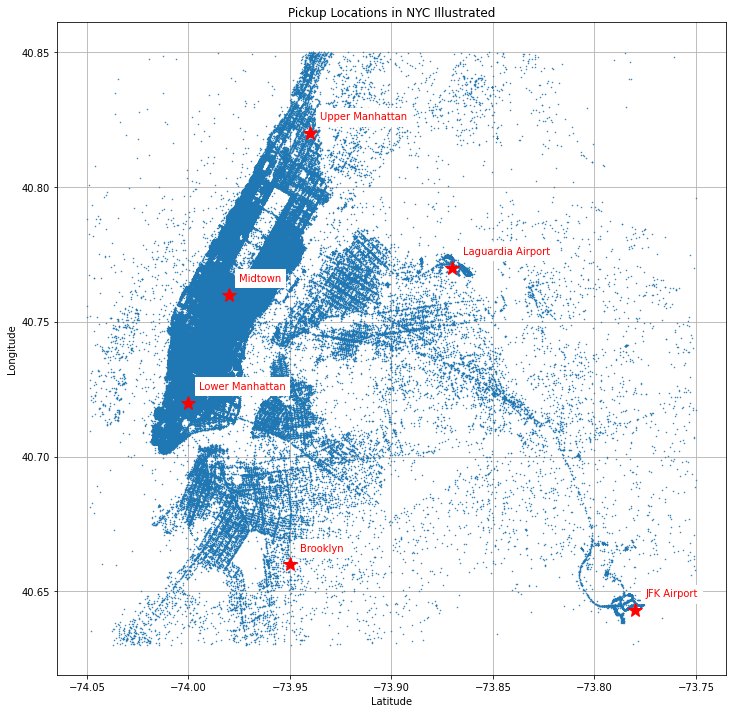

In [ ]:
plot_lat_long(df2, landmarks, points='Pickup')



*   In hanhattan, most pickups were around the midtwon are, followed by Lower Hanhattan. In comparison there are much fewer pickups in Upper Mahnhattan. This makes sense because Upper manhatan is a residential area, whereas most offices and tourist attraction s are located at Midtown and Lower Hanhattan.



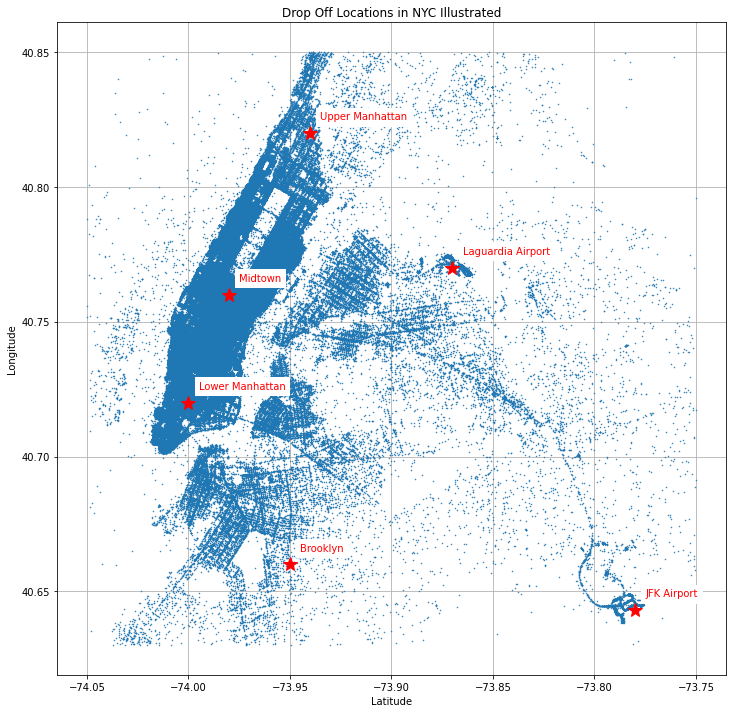

In [ ]:
plot_lat_long(df2, landmarks, points='Drop Off')

In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df['hour'] = df['pickup_datetime'].dt.hour

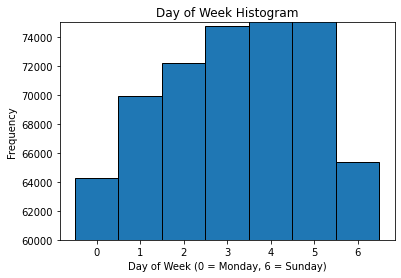

In [ ]:
import numpy as np

df['day_of_week'].plot.hist(bins=np.arange(8) - 0.5, ec ='black',ylim=(60000,75000))
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.title('Day of Week Histogram')

plt.show()

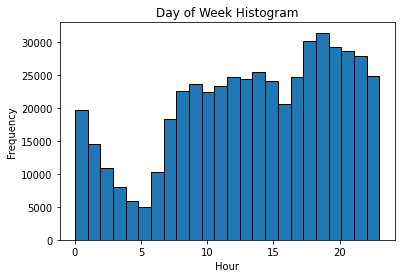

In [ ]:
df['hour'].plot.hist(bins=24, ec ='black')

plt.title('Day of Week Histogram')
plt.xlabel('Hour')
plt.show()

In [ ]:
# Handling missing values and data anomalies

In [ ]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
df = df.dropna()

We should check the data for outliers

In [ ]:
print(df.describe())

         fare_amount  pickup_longitude  ...    day_of_week           hour
count  499995.000000     499995.000000  ...  499995.000000  499995.000000
mean       11.358182        -72.520091  ...       3.042020      13.510843
std         9.916069         11.856446  ...       1.949243       6.511596
min       -44.900000      -2986.242495  ...       0.000000       0.000000
25%         6.000000        -73.992047  ...       1.000000       9.000000
50%         8.500000        -73.981785  ...       3.000000      14.000000
75%        12.500000        -73.967117  ...       5.000000      19.000000
max       500.000000       2140.601160  ...       6.000000      23.000000

[8 rows x 11 columns]


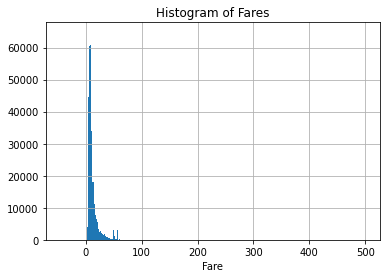

In [ ]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

trips to and from JFK airport incurs a flat fare of $52 plus tolls

In [ ]:

df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 100)]

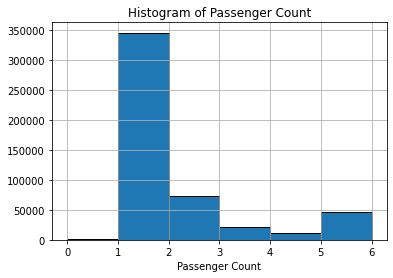

In [ ]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [ ]:
df.loc[df['passenger_count'] == 0,'passenger_count'] = 1

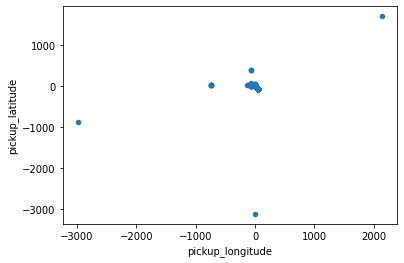

In [ ]:
df.plot.scatter('pickup_longitude','pickup_latitude')
plt.show()

In [ ]:
# range of longitude for NYC
nyc_min_longitude= -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
# Only consider locations within NYC
for long in ['pickup_longitude','dropoff_longitude']:
  df = df[(df[long]> nyc_min_longitude) & (df[long]< nyc_max_longitude)]
for lat in ['pickup_latitude','dropoff_latitude']:
  df = df[(df[lat]> nyc_min_latitude) & (df[lat]< nyc_max_latitude)]

In [ ]:
def preprocess(df): 
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df

    # remove outliers in fare amount
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
        df = df[(df['fare_amount'] >= lower_bound) & 
                (df['fare_amount'] <= upper_bound)]
        return df

    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode()
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode
        return df

    # remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75
        # range of latitude for NYC
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85
        # only consider locations within New York City
        for long in ['pickup_longitude', 'dropoff_longitude']:
            df = df[(df[long] > nyc_min_longitude) & 
                    (df[long] < nyc_max_longitude)]
        for lat in ['pickup_latitude', 'dropoff_latitude']:
            df = df[(df[lat] > nyc_min_latitude) & 
                    (df[lat] < nyc_max_latitude)]
        return df

    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0, 
                                     upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df

In [ ]:
# Temporal features
print(df.head()['pickup_datetime'])

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [ ]:
print(df.loc[:5,['pickup_datetime','year','month','day','day_of_week','hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [ ]:
df=df.drop(['pickup_datetime'],axis=1)

Euclidean Distance = sqrt(((x2-x1)^2) + ((y2-y1)^2))

In [ ]:
def euc_distance(lat1,long1,lat2,long2):
  return(((lat1-lat2)**2) + ((long1-long2)**2) **0.5)

In [ ]:
df['distance'] = euc_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

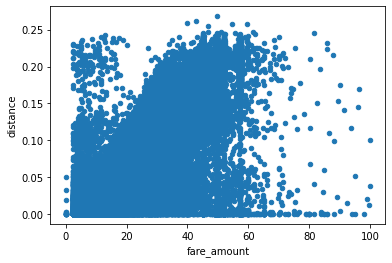

In [ ]:
df.plot.scatter('fare_amount','distance')
plt.show()

In [ ]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'],
                                                df['pickup_longitude'], 
                                                airports[airport][1], 
                                                airports[airport][0])
    df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], 
                                                 df['dropoff_longitude'],
                                                 airports[airport][1], 
                                                 airports[airport][0])

In [ ]:
print(df[['key', 'pickup_longitude','pickup_latitude',
          'dropoff_longitude','dropoff_latitude', 
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head())

                             key  ...  dropoff_dist_JFK_Airport
0    2009-06-15 17:26:21.0000001  ...                  0.066409
1    2010-01-05 16:52:16.0000002  ...                  0.218590
2   2011-08-18 00:35:00.00000049  ...                  0.222812
3    2012-04-21 04:30:42.0000001  ...                  0.224813
4  2010-03-09 07:51:00.000000135  ...                  0.196469

[5 rows x 7 columns]


In [ ]:
df = df.drop(['key'], axis=1)

In [ ]:
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df

    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'], 
                                             df['pickup_longitude'], 
                                             df['dropoff_latitude'],
                                             df['dropoff_longitude'])
        return df

    # create new column for the distance away from airports
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}
        for k in airports:
          df['pickup_dist_'+k]=euc_distance(df['pickup_latitude'], 
                                              df['pickup_longitude'],
                                              airports[k][1],
                                              airports[k][0])
          df['dropoff_dist_'+k]=euc_distance(df['dropoff_latitude'], 
                                               df['dropoff_longitude'],
                                               airports[k][1],
                                               airports[k][0]) 
        return df

    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df

In [ ]:
df_prescaled = df.copy()
df_scaled = df.drop(['fare_amount'],axis=1)
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled,columns =cols, index=df.index)
df_scaled = pd.concat([df_scaled,df['fare_amount']], axis=1)
df = df_scaled.copy()


In [ ]:
X = df.loc[:, df.columns != 'fare_amount'] 
y = df.loc[:, 'fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=1)

12086/12086 [==============================] - 16s 1ms/step - loss: 18.6155 - mse: 18.6155


In [ ]:
def predict_random(df_prescaled, X_test, model):
  sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high = 10000))
  idx = sample.index[0]
  actual_fare = df_prescaled.loc[idx,'fare_amount']
  day_names = [
               'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
  ]
  day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
  hour = df_prescaled.loc[idx,'hour']
  predicted_fare = model.predict(sample)[0][0]
  rmse = np.sqrt(np.square(predicted_fare-actual_fare))
  print("Trip Details: {}, {}:00hrs".format(day_of_week,hour))
  print("Actual fare: ${:0.2f}".format(actual_fare))
  print("Predicted fare: ${:0.2f}".format(predicted_fare))

  print("RMSE: ${:0.2f}".format(rmse))

In [ ]:
predict_random(df_prescaled,X_test, model)

Trip Details: Wednesday, 20:00hrs
Actual fare: $6.90
Predicted fare: $6.31
RMSE: $0.59


In [ ]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))

print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.51
Test RMSE: 3.60
